In [9]:
import yfinance as yf
import numpy as np
from datetime import date
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def get_data(stocks, num_days):
    price_data = yf.download(stocks, start = date.today() - timedelta(days = num_days + 7), end = date.today() - timedelta(days = 1))['Close']
    log_returns = np.log(1 + price_data.pct_change())
    return log_returns[-num_days:]

In [11]:
def monte_carlo_simulation(log_returns, weights, num_days, num_iterations):
    results = pd.DataFrame()

    for i in range(num_iterations):
        num_assets = len(weights)
        portfolio_mean = np.sum(log_returns.mean() * weights) * num_days
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * num_days, weights)))
        daily_returns=np.random.normal(portfolio_mean/num_days,portfolio_std_dev/np.sqrt(num_days),num_days)+1
        price_list = [1]

        for x in daily_returns:
            price_list.append(price_list[-1]*x)

        results[i] = price_list

    return results

In [18]:
def plot_results(price_lists):
    plt.figure(figsize=(10,5))
    plt.title('Monte Carlo Simulation')
    for i in range(price_lists.shape[1]):
        plt.plot(price_lists[i], color='blue', alpha=0.1)
    plt.xlabel('Day')
    plt.ylabel('Portfolio Price')
    plt.show()

    plt.figure(figsize=(10,5))
    plt.hist(price_lists.iloc[-1, :], bins=50, color='blue')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation Results')
    plt.show()

    print(f'Mean return: {price_lists.iloc[-1, :].mean()}')
    print(f'STD return: {price_lists.iloc[-1, :].std()}')

[*********************100%***********************]  3 of 3 completed


Streaming output truncated to the last 5000 lines.
<ipython-input-11-88c6f40dfa84>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results[i] = price_list
<ipython-input-11-88c6f40dfa84>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results[i] = price_list
<ipython-input-11-88c6f40dfa84>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

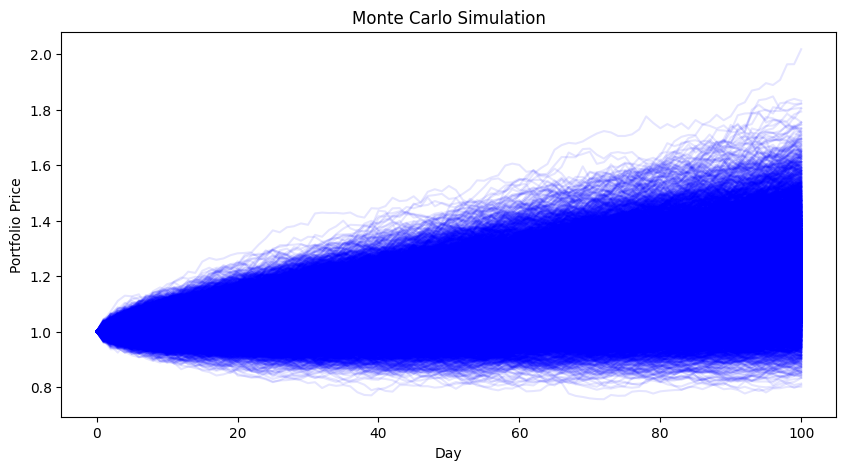

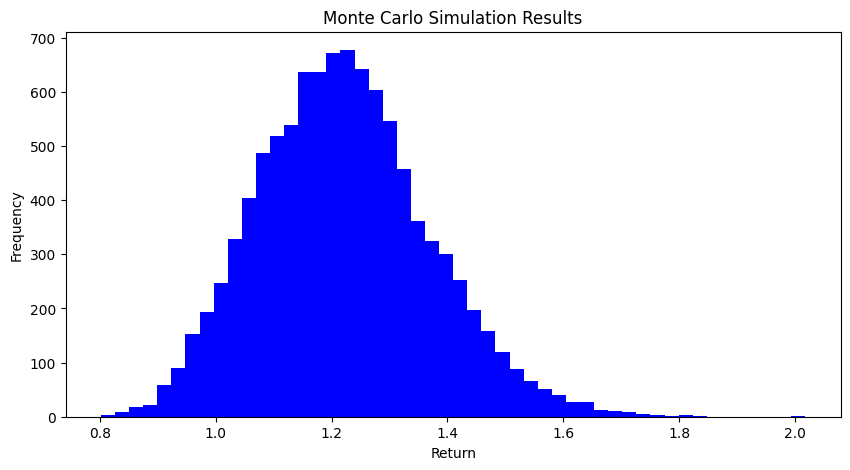

Mean return: 1.2214699983473558
STD return: 0.14803900175530466


In [19]:
tickers = ['AAPL', 'MSFT', 'GOOG']
weights = np.array([0.4, 0.4, 0.2])
num_days = 100
num_iterations = 10000

log_returns = get_data(tickers, num_days)

price_lists = monte_carlo_simulation(log_returns, weights, num_days, num_iterations)

plot_results(price_lists)